# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('df_tratado_para_DT.csv')
df.head(15)

,Unnamed: 0,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,0,58.832877,3.106849,1,0,0,0,2.0,False,...,True,True,False,False,False,True,False,False,False,False
1,1,0,52.356164,8.358904,1,0,1,1,1.0,False,...,True,False,False,True,False,True,False,False,False,False
2,2,0,52.356164,8.358904,1,0,1,1,1.0,False,...,True,False,False,True,False,True,False,False,False,False
3,3,0,46.224658,2.106849,1,1,1,1,2.0,False,...,False,True,False,False,False,True,False,False,False,False
4,4,0,29.230137,3.021918,1,0,0,0,2.0,False,...,False,True,False,False,False,True,False,False,False,False
5,5,0,29.230137,3.021918,1,0,0,0,2.0,False,...,False,True,False,False,False,True,False,False,False,False
6,6,0,27.482192,4.024658,1,0,1,0,2.0,False,...,True,True,False,False,False,True,False,False,False,False
7,7,0,27.482192,4.024658,1,0,1,0,2.0,False,...,True,True,False,False,False,True,False,False,False,False
8,8,1,30.049315,4.438356,1,0,0,0,2.0,False,...,True,False,False,True,False,True,False,False,False,False
9,9,1,30.049315,4.438356,1,0,0,0,2.0,False,...,True,False,False,True,False,True,False,False,False,False


In [3]:
df.columns

Index(['Unnamed: 0', 'qtd_filhos', 'idade', 'tempo_emprego', 'possui_celular',
       'possui_fone_comercial', 'possui_fone', 'possui_email',
       'qt_pessoas_residencia', 'mau', 'sexo_M', 'posse_de_veiculo_Y',
       'posse_de_imovel_Y', 'tipo_renda_Pensioner', 'tipo_renda_State servant',
       'tipo_renda_Student', 'tipo_renda_Working', 'educacao_Higher education',
       'educacao_Incomplete higher', 'educacao_Lower secondary',
       'educacao_Secondary / secondary special', 'estado_civil_Married',
       'estado_civil_Separated', 'estado_civil_Single / not married',
       'estado_civil_Widow', 'tipo_residencia_House / apartment',
       'tipo_residencia_Municipal apartment',
       'tipo_residencia_Office apartment', 'tipo_residencia_Rented apartment',
       'tipo_residencia_With parents'],
      dtype='object')

In [4]:
# Remover a coluna "Unnamed: 0"
df = df.drop(columns=['Unnamed: 0'])

# Conferir resultado
df.head()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,True,...,True,True,False,False,False,True,False,False,False,False
1,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,True,False,False,True,False,True,False,False,False,False
2,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,True,False,False,True,False,True,False,False,False,False
3,0,46.224658,2.106849,1,1,1,1,2.0,False,True,...,False,True,False,False,False,True,False,False,False,False
4,0,29.230137,3.021918,1,0,0,0,2.0,False,False,...,False,True,False,False,False,True,False,False,False,False


In [5]:
y = df.mau
y

0        False
1        False
2        False
3        False
4        False
         ...  
16645     True
16646     True
16647     True
16648     True
16649     True
Name: mau, Length: 16650, dtype: bool

In [6]:
X = df.drop('mau',axis=1)
X

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,sexo_M,posse_de_veiculo_Y,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,True,True,...,True,True,False,False,False,True,False,False,False,False
1,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,True,False,False,True,False,True,False,False,False,False
2,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,True,False,False,True,False,True,False,False,False,False
3,0,46.224658,2.106849,1,1,1,1,2.0,True,True,...,False,True,False,False,False,True,False,False,False,False
4,0,29.230137,3.021918,1,0,0,0,2.0,False,True,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,0,54.109589,9.884932,1,0,0,0,2.0,False,False,...,True,False,False,False,False,True,False,False,False,False
16646,0,43.389041,7.380822,1,1,1,0,2.0,False,False,...,True,True,False,False,False,True,False,False,False,False
16647,0,30.005479,9.800000,1,1,0,0,2.0,True,True,...,True,True,False,False,False,True,False,False,False,False
16648,0,30.005479,9.800000,1,1,0,0,2.0,True,True,...,True,True,False,False,False,True,False,False,False,False


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [8]:
# 1. Defininf o objeto da árvore de decisão
clf = DecisionTreeClassifier(random_state=100)
# 2. Treinando o modelo
clf = clf.fit(X_train,y_train)
clf

DecisionTreeClassifier(random_state=100)

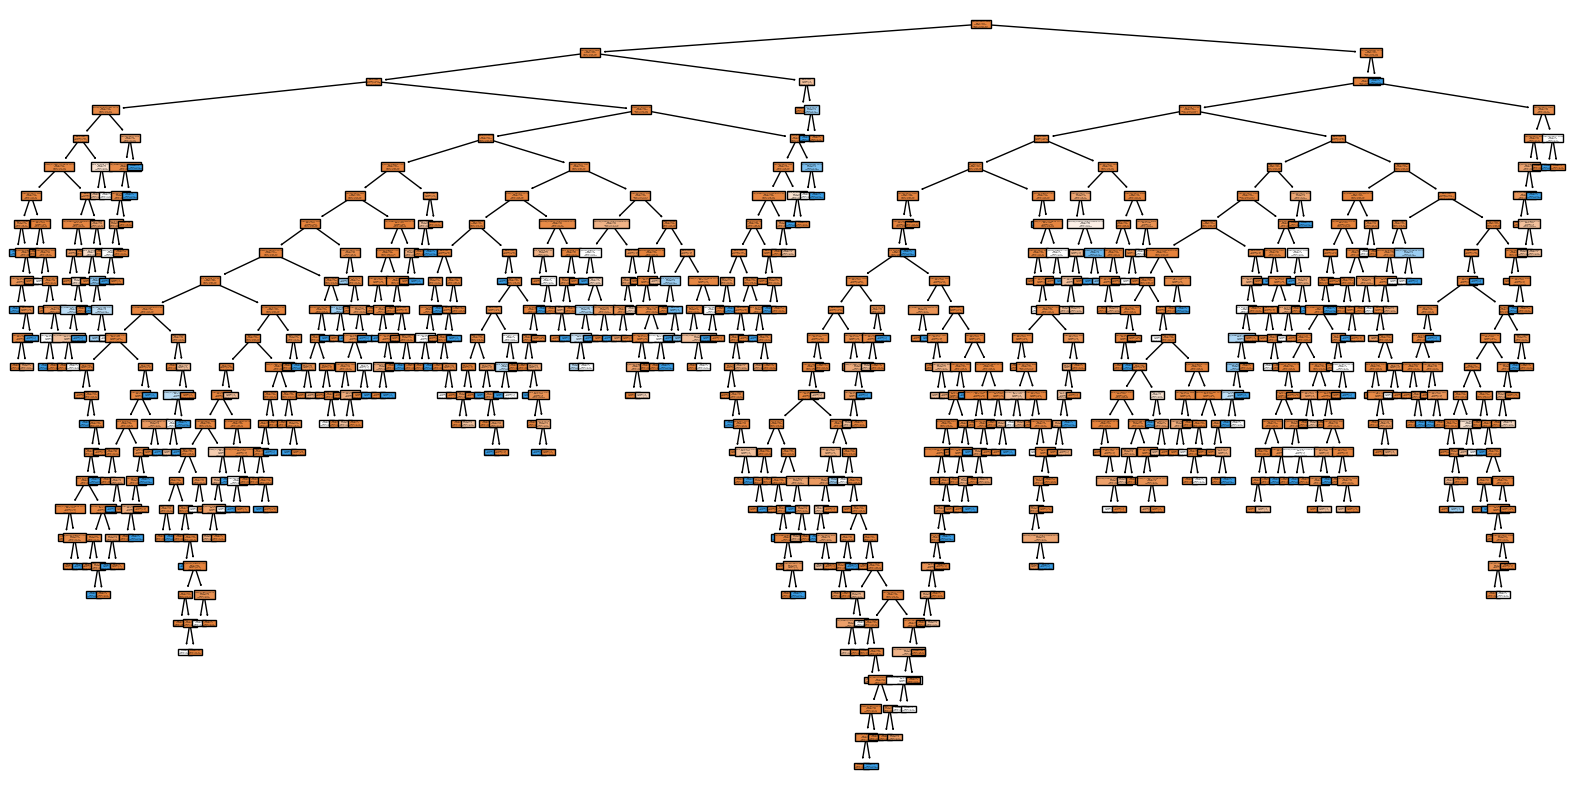

In [18]:
# 3. Visualizando a árvore
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=["aprovados", "reprovados"], filled=True)
plt.show()

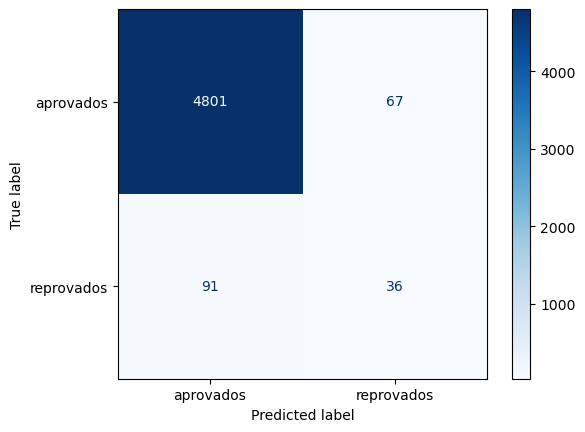

In [10]:
# 4. Matriz de confusão
# Fazer previsões na base de teste
y_pred = clf.predict(X_test)

# Criar matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Visualizar
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["aprovados", "reprovados"])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [11]:
# 5. Acurácia
# Previsões na base de treino
y_train_pred = clf.predict(X_train)

# Calcular acurácia
acc_train = accuracy_score(y_train, y_train_pred)
print(f"Acurácia na base de treinamento: {acc_train:.4f}")

Acurácia na base de treinamento: 0.9911


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [12]:
# 1. Classificando a base de teste com a árvore treinada
y_pred_test = clf.predict(X_test)

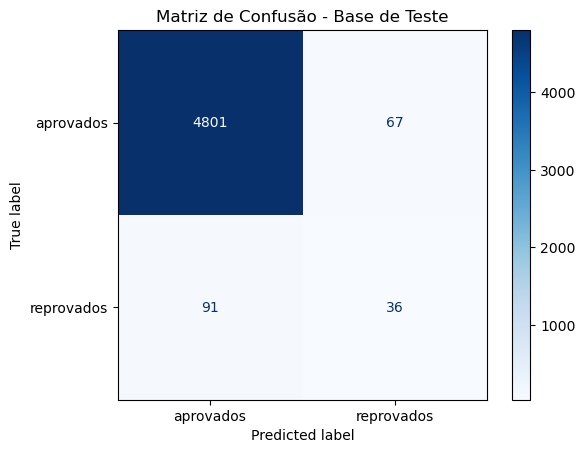

In [13]:
# 2. Matriz de confusão na base de teste
cm_test = confusion_matrix(y_test, y_pred_test)

disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                                   display_labels=["aprovados", "reprovados"])
disp_test.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - Base de Teste")
plt.show()

In [14]:
# 3. Acurácia na base de teste e comparação
acc_test = accuracy_score(y_test, y_pred_test)

print(f"Acurácia Treinamento: {acc_train:.4f}")
print(f"Acurácia Teste: {acc_test:.4f}")

Acurácia Treinamento: 0.9911
Acurácia Teste: 0.9684


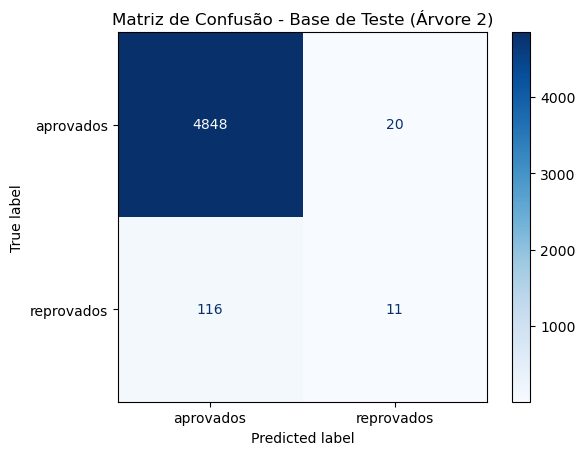


Distribuição das predições na base de teste:
False    0.993794
True     0.006206
Name: proportion, dtype: float64
Proporção classificados como 'maus': 0.00%


In [15]:
# 4. Treinando nova árvore com restrições
arvore2 = DecisionTreeClassifier(min_samples_leaf=5,
                                  max_depth=10,
                                  random_state=123)

# Treinar
arvore2.fit(X_train, y_train)

# Previsões na base de teste
y_pred_test2 = arvore2.predict(X_test)

# Matriz de confusão
cm_test2 = confusion_matrix(y_test, y_pred_test2)
disp_test2 = ConfusionMatrixDisplay(confusion_matrix=cm_test2,
                                    display_labels=["aprovados", "reprovados"])
disp_test2.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - Base de Teste (Árvore 2)")
plt.show()

# Distribuição das predições (em %)
pred_dist = pd.Series(y_pred_test2).value_counts(normalize=True)

print("\nDistribuição das predições na base de teste:")
print(pred_dist)

# Proporção de 'maus' (classe 1) com segurança
prop_maus = pred_dist.loc[1] if 1 in pred_dist.index else 0
print(f"Proporção classificados como 'maus': {prop_maus:.2%}")

In [16]:
# 5. Acurácia se todos fossem classificados como 'bons'
y_pred_all_good = np.zeros_like(y_test)

acc_all_good = accuracy_score(y_test, y_pred_all_good)
print(f"Acurácia classificando todos como bons: {acc_all_good:.4f}")

Acurácia classificando todos como bons: 0.9746
